#### loading libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### loading dataset

In [175]:
city_day = pd.read_csv("D:\\air_quality_india\city_day.csv")
city_hour = pd.read_csv("D:\\air_quality_india\city_hour.csv")
station_day = pd.read_csv("D:\\air_quality_india\station_day.csv")
#station_hour = pd.read_csv("D:\\air_quality_india\station_hour.csv")
station_hour = pd.read_csv("D:\\air_quality_india\station_hour.csv", low_memory=False)
stations = pd.read_csv("D:\\air_quality_india\stations.csv")

#### data preprocessing

In [176]:
city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [177]:
city_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [178]:
city_hour.shape

(707875, 16)

#### missing value

In [179]:
city_hour.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

#### we have alot of columns which has missing values so we handle missing values in next steps.

In [180]:
city_hour['PM2.5'] = city_hour['PM2.5'].fillna(city_hour['PM2.5'].mean())
city_hour['PM10'] = city_hour['PM10'].fillna(city_hour['PM10'].mean())
city_hour['NO'] = city_hour['NO'].fillna(city_hour['NO'].mean())
city_hour['NO2'] = city_hour['NO2'].fillna(city_hour['NO2'].mean())
city_hour['NOx'] = city_hour['NOx'].fillna(city_hour['NOx'].mean())
city_hour['NH3'] = city_hour['NH3'].fillna(city_hour['NH3'].mean())
city_hour['CO'] = city_hour['CO'].fillna(city_hour['CO'].mean())
city_hour['SO2'] = city_hour['SO2'].fillna(city_hour['SO2'].mean())
city_hour['O3'] = city_hour['O3'].fillna(city_hour['O3'].mean())
city_hour['Benzene'] = city_hour['Benzene'].fillna(city_hour['Benzene'].mean())
city_hour['Toluene'] = city_hour['Toluene'].fillna(city_hour['Toluene'].mean())
city_hour['Xylene'] = city_hour['Xylene'].fillna(city_hour['Xylene'].mean())

In [181]:
#city_hour['AQI'].value_counts()

In [182]:
#city_hour['AQI'] = city_hour['AQI'].fillna('166.463581')

In [183]:
city_hour['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        198991
Satisfactory    189434
Poor             66654
Very Poor        57455
Good             38611
Severe           27650
Name: count, dtype: int64

In [184]:
city_hour['AQI_Bucket'] = city_hour['AQI_Bucket'].fillna('Moderate')

In [185]:
city_hour.isnull().sum()

City               0
Datetime           0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
Benzene            0
Toluene            0
Xylene             0
AQI           129080
AQI_Bucket         0
dtype: int64

#### EDA

In [186]:
city_wise_AQI = city_hour[['City','AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()
city_wise_AQI.head()

,City,AQI
0,Aizawl,23.0
1,Shillong,48.0
2,Thiruvananthapuram,68.0
3,Coimbatore,74.0
4,Amaravati,78.0


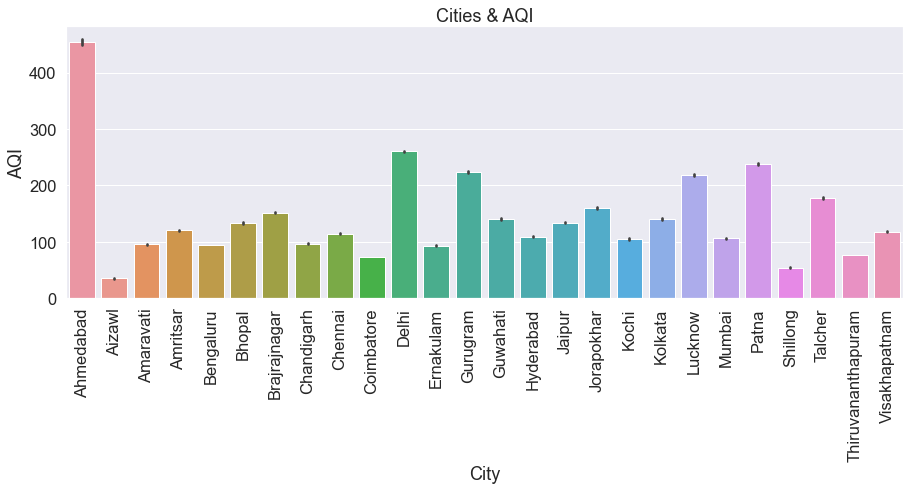

In [187]:
plt.figure(figsize=(15,5))
sns.barplot(x= city_hour.City, y= city_hour.AQI ).set(title ='Cities & AQI')
plt.xticks(rotation=90)
plt.show()

### On Average, Aizwal has been the city with the best AQI and Delhi, Ahmedabad, Lucknow have very poor AQ-indices.

In [188]:
import datetime as dt
city_hour['Date'] = pd.to_datetime(city_hour['Datetime'])
city_hour['year'] = city_hour['Date'].dt.year
city_hour['month'] = city_hour['Date'].dt.month
city_hour.drop('Date',axis=1,inplace=True)

In [189]:
city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month
0,Ahmedabad,2015-01-01 01:00:00,67.622994,119.075804,1.00,40.01,36.37,23.607959,1.00,122.07,34.798979,0.0,0.0,0.0,NaN,Moderate,2015,1
1,Ahmedabad,2015-01-01 02:00:00,67.622994,119.075804,0.02,27.75,19.73,23.607959,0.02,85.90,34.798979,0.0,0.0,0.0,NaN,Moderate,2015,1
2,Ahmedabad,2015-01-01 03:00:00,67.622994,119.075804,0.08,19.32,11.08,23.607959,0.08,52.83,34.798979,0.0,0.0,0.0,NaN,Moderate,2015,1
3,Ahmedabad,2015-01-01 04:00:00,67.622994,119.075804,0.30,16.45,9.20,23.607959,0.30,39.53,153.580000,0.0,0.0,0.0,NaN,Moderate,2015,1
4,Ahmedabad,2015-01-01 05:00:00,67.622994,119.075804,0.12,14.90,7.85,23.607959,0.12,32.63,34.798979,0.0,0.0,0.0,NaN,Moderate,2015,1


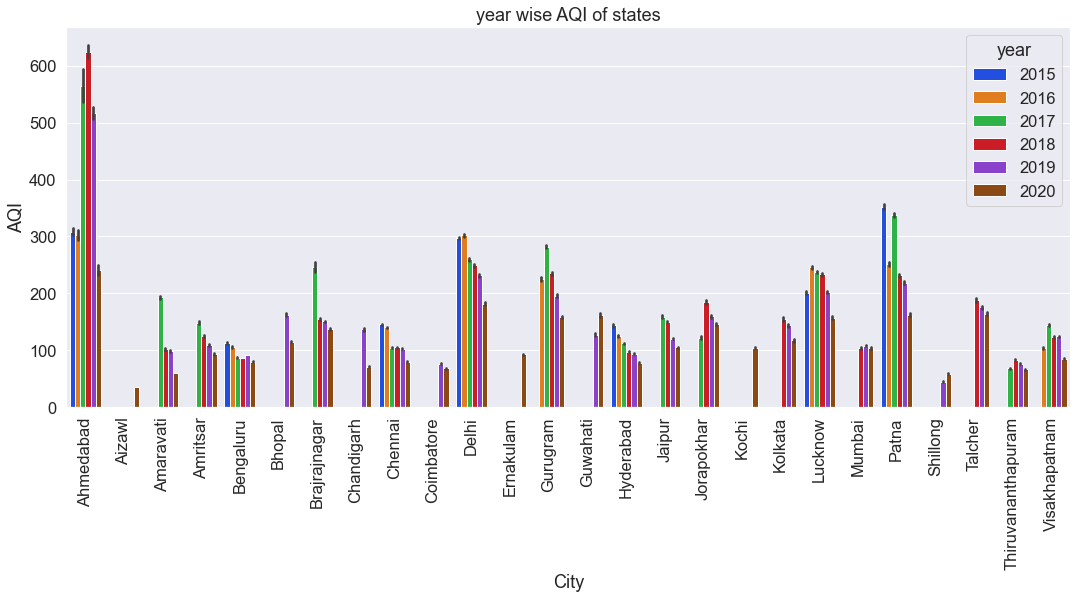

In [190]:
plt.figure(figsize=(18,7))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=city_hour,hue='year',palette='bright').set(title ='year wise AQI of states')
plt.xticks(rotation=90)
plt.show()

### The plot shows a huge spike in the AQI for the city of Ahmedabad during the years 2018 & 2019

In [191]:
month_wise = city_hour.groupby(['City','month']).agg(
    #month = pd.NamedAgg(column='month',aggfunc = max),
    AQI = pd.NamedAgg(column = 'AQI',aggfunc = np.mean))
month_wise.reset_index(inplace = True)

In [192]:
month_wise.head()

,City,month,AQI
0,Ahmedabad,1,598.442354
1,Ahmedabad,2,642.737132
2,Ahmedabad,3,522.690459
3,Ahmedabad,4,403.286046
4,Ahmedabad,5,274.363001


In [193]:
city_hour[city_hour['City']=='Ahmedabad'].sort_values('AQI',ascending=False).head()[['City','AQI']]

,City,AQI
25127,Ahmedabad,3133.0
25128,Ahmedabad,3133.0
25133,Ahmedabad,3133.0
25132,Ahmedabad,3133.0
25131,Ahmedabad,3133.0


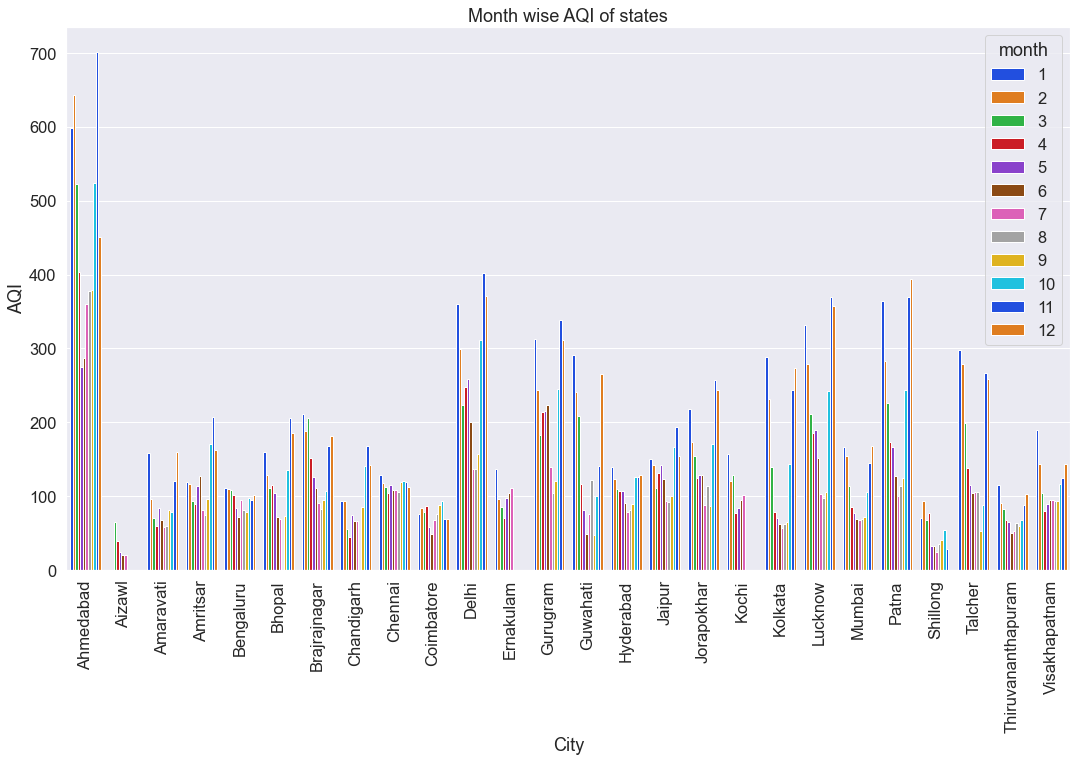

In [194]:
plt.figure(figsize=(18,10))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=month_wise,hue='month',palette = 'bright').set(title ='Month wise AQI of states')
plt.xticks(rotation=90)
plt.show()

### Tha AQI among most cities spiked on Nov, Dec, Jan & Feb months, Could be an indicator of how the way of celebrating certain festivals(which fall during or close to these months) effect the environment around us.

# now we look at different cities

In [195]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


#### data preprocessing

In [196]:
city_day.shape

(29531, 16)

In [197]:
city_day['City'].nunique()

26

#### handling missing values

In [198]:
city_day.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [199]:
cols = city_day.columns
cols

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [200]:
col_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene','AQI']

In [201]:
#df = df.fillna(df.mean())
for col in col_to_fill:
    city_day[col] = city_day[col].fillna(city_day[col].median())

In [202]:
city_day['AQI_Bucket'] = city_day['AQI_Bucket'].fillna('Moderate')

In [203]:
city_day.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [204]:
df= city_day.drop(columns = ['City','Date','AQI_Bucket'])
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0


### Data Modeling

In [205]:
X=df.drop(['AQI'],axis=1)
y=df['AQI']
print(X.shape)
print(y.shape)

(29531, 12)
(29531,)


In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (23624, 12)
X_test (5907, 12)
y_train (23624,)
y_test (5907,)


In [208]:
from sklearn.preprocessing import StandardScaler

In [209]:
ss = StandardScaler()
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

### GradientBoostingRegressor

In [210]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
GBR.score(X_test,y_test)

0.8762111463780022

In [211]:
from sklearn.metrics import mean_squared_error, r2_score

t_pred=GBR.predict(X_train)
print('train mse: {}'.format(
    mean_squared_error((y_train), (t_pred))))
print('train rmse: {}'.format(
    mean_squared_error((y_train), (t_pred), squared=False)))
print('train r2: {}'.format(
    r2_score((y_train), (t_pred))))
print()


y_pred=GBR.predict(X_test)
print('test mse: {}'.format(
    mean_squared_error((y_test), (y_pred))))
print('test rmse: {}'.format(
    mean_squared_error((y_test), (y_pred), squared=False)))
print('test r2: {}'.format(
    r2_score((y_test), (y_pred))))

train mse: 1693.7238309134111
train rmse: 41.15487614989761
train r2: 0.8989817307346941

test mse: 2200.5762686437524
test rmse: 46.910300240392324
test r2: 0.8762111463780022


### Decision Trees

In [212]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.8415769811004119

In [213]:
from sklearn.metrics import mean_squared_error, r2_score

t_pred=regressor.predict(X_train)
print('train mse: {}'.format(
    mean_squared_error((y_train), (t_pred))))
print('train rmse: {}'.format(
    mean_squared_error((y_train), (t_pred), squared=False)))
print('train r2: {}'.format(
    r2_score((y_train), (t_pred))))
print()


y_pred=regressor.predict(X_test)
print('test mse: {}'.format(
    mean_squared_error((y_test), (y_pred))))
print('test rmse: {}'.format(
    mean_squared_error((y_test), (y_pred), squared=False)))
print('test r2: {}'.format(
    r2_score((y_test), (y_pred))))

train mse: 2578.3806740027667
train rmse: 50.77775767009377
train r2: 0.8462184044169666

test mse: 2816.262737692749
test rmse: 53.068472162789355
test r2: 0.8415769811004119


### Linear Regression

In [214]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train, y_train)
l.score(X_test,y_test)

0.8099811971320393

In [215]:
from sklearn.metrics import mean_squared_error, r2_score

t_pred=l.predict(X_train)
print('train mse: {}'.format(
    mean_squared_error((y_train), (t_pred))))
print('train rmse: {}'.format(
    mean_squared_error((y_train), (t_pred), squared=False)))
print('train r2: {}'.format(
    r2_score((y_train), (t_pred))))
print()


y_pred=l.predict(X_test)
print('test mse: {}'.format(
    mean_squared_error((y_test), (y_pred))))
print('test rmse: {}'.format(
    mean_squared_error((y_test), (y_pred), squared=False)))
print('test r2: {}'.format(
    r2_score((y_test), (y_pred))))

train mse: 3539.0543739730374
train rmse: 59.4899518740185
train r2: 0.7889212271980817

test mse: 3377.9363484873784
test rmse: 58.120016762621276
test r2: 0.8099811971320393


### Random Forest 

In [216]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)

0.8883940916899562

In [217]:
from sklearn.metrics import mean_squared_error, r2_score

t_pred=rf_model.predict(X_train)
print('train mse: {}'.format(
    mean_squared_error((y_train), (t_pred))))
print('train rmse: {}'.format(
    mean_squared_error((y_train), (t_pred), squared=False)))
print('train r2: {}'.format(
    r2_score((y_train), (t_pred))))
print()


y_pred=rf_model.predict(X_test)
print('test mse: {}'.format(
    mean_squared_error((y_test), (y_pred))))
print('test rmse: {}'.format(
    mean_squared_error((y_test), (y_pred), squared=False)))
print('test r2: {}'.format(
    r2_score((y_test), (y_pred))))

train mse: 317.15334457411814
train rmse: 17.8087996387774
train r2: 0.9810841169169223

test mse: 1984.0018392727832
test rmse: 44.54213554908188
test r2: 0.8883940916899562


## Out of all Random Forest Regressor performs better than above all regression algorithms